In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## BEGIN OF NOTEBOOK


In [2]:
bc=pd.read_csv("data.csv",index_col=0)

In [3]:
bc=bc.loc[:, ~bc.columns.str.contains('^Unnamed')]

In [4]:
print(bc.head())
print(bc.shape)

         diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_

In [5]:
bc.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# FITTING K=6 FOR FULL DATA BEFORE CV


In [6]:
X_train, X_test, y_train, y_test = train_test_split(bc.drop('diagnosis',axis=1).values, bc['diagnosis'].values, test_size = .40, random_state=42,stratify= bc['diagnosis'].values)
#Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.

In [7]:
knn=KNeighborsClassifier(n_neighbors=6)

In [8]:
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

Accuracy at KNN =6 is 92% but is not informative


In [9]:
print(knn.score(X_test, y_test))
# print the accuracy of the classifier's predictions

0.921052631579


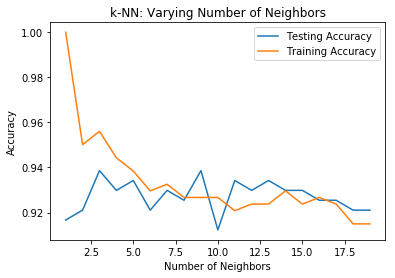

In [10]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 14)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [11]:
y_pred = knn.predict(X_test)


In [12]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[142   1]
 [ 17  68]]
             precision    recall  f1-score   support

          B       0.89      0.99      0.94       143
          M       0.99      0.80      0.88        85

avg / total       0.93      0.92      0.92       228



In [1]:
np.random.seed(1)
param_grid={'n_neighbors':np.arange(1,20)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=10)


NameError: name 'np' is not defined

In [14]:
knn_cv.fit(bc.drop('diagnosis',axis=1).values, bc['diagnosis'].values)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
knn_cv.best_score_

0.93321616871704749

In [16]:
knn_cv.best_params_

{'n_neighbors': 14}

## USING GRID SEARCH CV BEST K=14


In [17]:
X_train, X_test, y_train, y_test = train_test_split(bc.drop('diagnosis',axis=1).values, bc['diagnosis'].values, test_size = .40, random_state=42,stratify= bc['diagnosis'].values)
knn=KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

In [18]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[142   1]
 [ 15  70]]
             precision    recall  f1-score   support

          B       0.90      0.99      0.95       143
          M       0.99      0.82      0.90        85

avg / total       0.93      0.93      0.93       228

